In [2]:
import pandas as pd

url = "https://www.data.gouv.fr/fr/datasets/r/ea4f5879-af40-4e3e-949d-812d6eeb5e02"

data = pd.read_csv(url, delimiter=';')

recensement = data[['inst_numero', 'inst_nom', 'dep_nom', 'new_code', 'new_name', 'inst_etat', 
                    'inst_date_creation', 'inst_date_etat', 'inst_date_valid', 'inst_acc_handi_bool', 
                    'inst_trans_bool', 'equip_numero', 'equip_nom', 'equip_type_code', 
                    'equip_type_name', 'equip_type_famille', 'equip_x', 'equip_y', 
                    'equip_etat', 'equip_eclair', 'equip_douche', 'equip_sanit', 
                    'equip_pmr_aire', 'equip_pmr_douche', 'equip_pmr_sanit', 
                    'equip_travaux_date', 'equip_service_date', 'equip_travaux_type', 
                    'equip_energie', 'equip_prop_type', 'dens_lib', 'zrr_simp']]

/tmp/ipykernel_29550/601804400.py:5: DtypeWarning: Columns (4,6,57,69,103,105,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, delimiter=';')


In [3]:
doublons = (recensement
            .groupby(['inst_nom', 'new_code'])
            .size()
            .reset_index(name='n')
            .query('n > 0'))
print(doublons.head)

<bound method NDFrame.head of                                  inst_nom new_code  n
0           "Aire de jeux" Calebassiers 3    97411  1
1                           "Le Sépulcre"  22187.0  2
2           "Le circuit de Saint Mathieu"    29190  1
3       "Le circuit de Saint-Demet" N° 22    29215  1
4             "le 107" saut à l'élastique    48094  1
...                                   ...      ... ..
157718                  étang des oiseaux  57255.0  1
157719                   étang des pelles  25085.0  1
157720                    étangs de pêche    42293  1
157721                    étape cavalière    69018  3
157722                  étrier de Moselle  57534.0  4

[157723 rows x 3 columns]>


In [4]:
distinct = recensement.drop_duplicates(subset=['inst_nom', 'new_code'], keep='first')

df_epure = pd.merge(distinct, doublons, on=['inst_nom', 'new_code'], how='outer')

/tmp/ipykernel_29550/2049927570.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='Oranges')


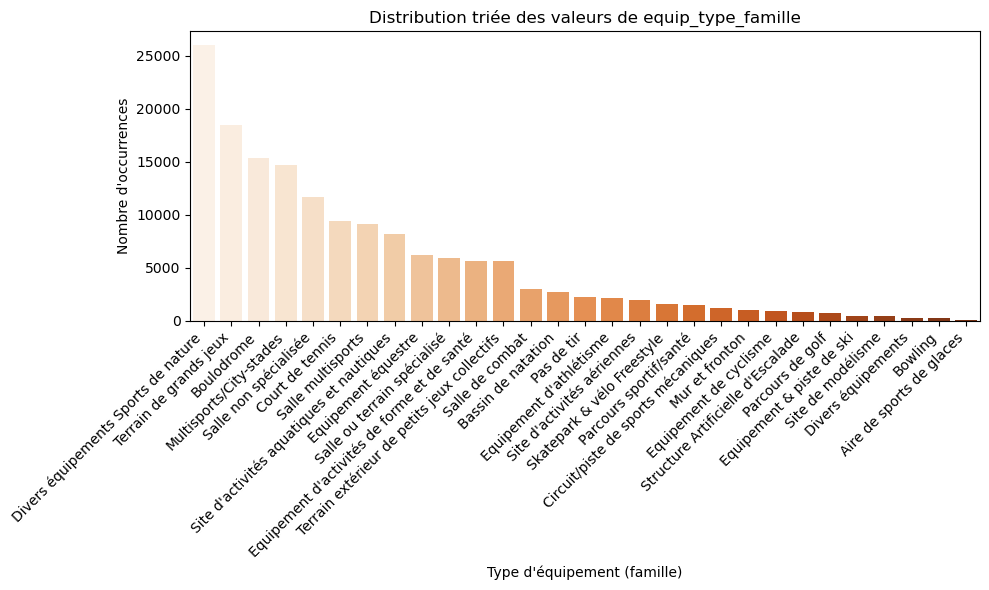

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une table de fréquences
freq_table = pd.DataFrame(df_epure['equip_type_famille'].value_counts()).reset_index()
freq_table.columns = ['Var1', 'Freq']

# Visualiser avec un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='Oranges')
plt.title("Distribution triée des valeurs de equip_type_famille")
plt.xlabel("Type d'équipement (famille)")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

boulodromes_dep = (df_epure[df_epure['equip_type_famille'] == "Boulodrome"]
                   .groupby('dep_nom')
                   .size()
                   .reset_index(name='nombre')
                   .sort_values(by='nombre', ascending=False))

/tmp/ipykernel_29550/3219396892.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dep_nom', y='nombre', data=boulodromes_dep, palette='Blues', edgecolor='black')


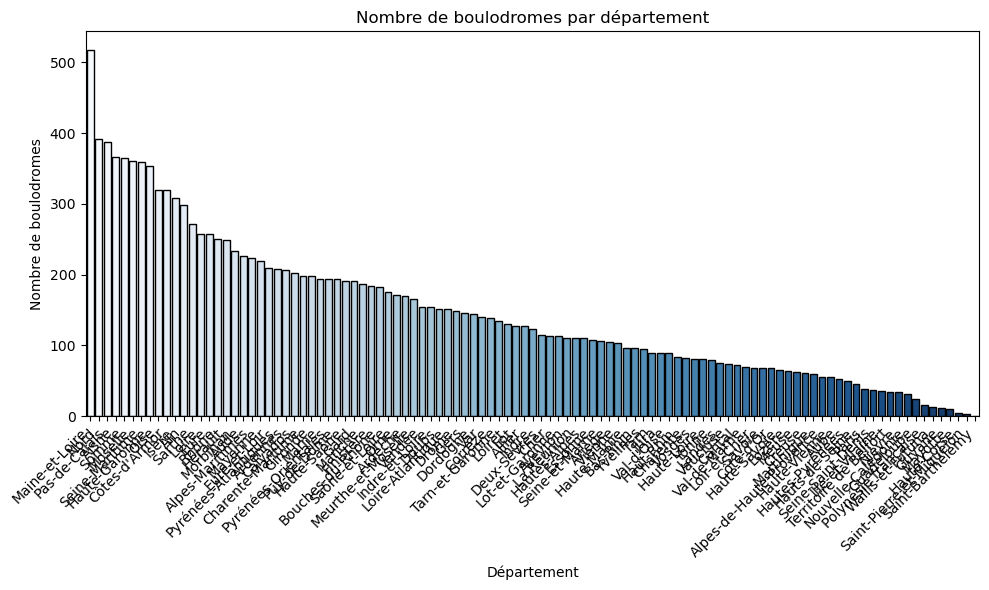

In [6]:
boulodromes_dep = df_epure[df_epure['equip_type_famille'] == "Boulodrome"] \
    .groupby('dep_nom') \
    .size() \
    .reset_index(name='nombre') \
    .sort_values(by='nombre', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='dep_nom', y='nombre', data=boulodromes_dep, palette='Blues', edgecolor='black')
plt.title("Nombre de boulodromes par département")
plt.xlabel("Département")
plt.ylabel("Nombre de boulodromes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_29550/4161481416.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dep_nom', y='nombre', data=tir_dep, palette='Blues', edgecolor='black')


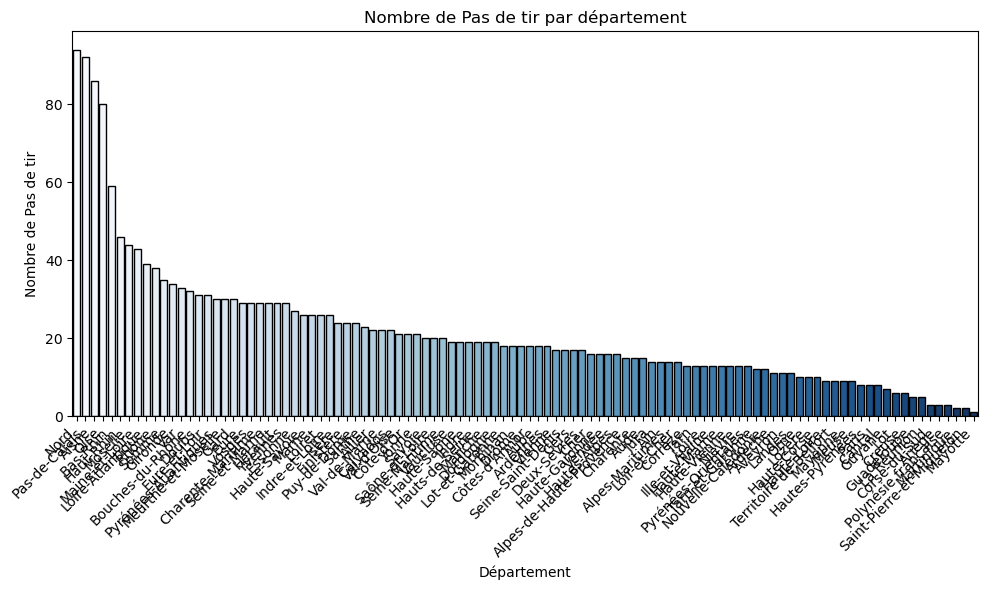

In [7]:
tir_dep = df_epure[df_epure['equip_type_famille'] == "Pas de tir"] \
    .groupby('dep_nom') \
    .size() \
    .reset_index(name='nombre') \
    .sort_values(by='nombre', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='dep_nom', y='nombre', data=tir_dep, palette='Blues', edgecolor='black')
plt.title("Nombre de Pas de tir par département")
plt.xlabel("Département")
plt.ylabel("Nombre de Pas de tir")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


CARTOGRAPHIE

  code_insee               nom  nuts3              wikipedia  surf_km2  \
0        974        La Réunion  FR940          fr:La Réunion    2505.0   
1         11              Aude  FR811  fr:Aude (département)    6343.0   
2         43       Haute-Loire  FR723         fr:Haute-Loire    5003.0   
3         13  Bouches-du-Rhône  FR823    fr:Bouches-du-Rhône    5247.0   
4         47    Lot-et-Garonne  FR614      fr:Lot-et-Garonne    5385.0   

                                            geometry  
0  MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -...  
1  POLYGON ((1.68872 43.27368, 1.69001 43.27423, ...  
2  POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...  
3  MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...  
4  POLYGON ((-0.14058 44.22648, -0.12931 44.23218...  


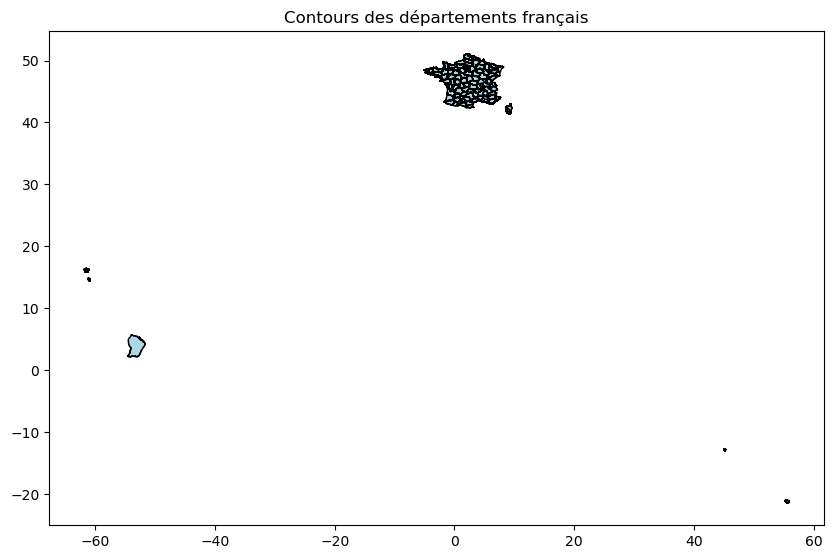

In [8]:
import requests
import geopandas as gpd
from io import BytesIO

# URL de la ressource (fichier GeoJSON)
url2 = "https://www.data.gouv.fr/fr/datasets/r/eb36371a-761d-44a8-93ec-3d728bec17ce"

# Télécharger le fichier GeoJSON
response = requests.get(url2)

if response.status_code == 200:
    # Charger le fichier dans un GeoDataFrame
    gdf = gpd.read_file(BytesIO(response.content))

    # Afficher les 5 premières lignes du GeoDataFrame
    print(gdf.head())

    # Tracer la carte des départements
    gdf.plot(figsize=(10, 10), edgecolor='black', color='lightblue')
    plt.title("Contours des départements français")
    plt.show()
else:
    print(f"Erreur lors du téléchargement du fichier: {response.status_code}")


In [9]:
gdf_metropole = gdf[~gdf['code_insee'].str.startswith('97')]  # Exclure les départements d'outre-mer
print(gdf_metropole.head)

<bound method NDFrame.head of     code_insee               nom  nuts3                 wikipedia  surf_km2  \
1           11              Aude  FR811     fr:Aude (département)    6343.0   
2           43       Haute-Loire  FR723            fr:Haute-Loire    5003.0   
3           13  Bouches-du-Rhône  FR823       fr:Bouches-du-Rhône    5247.0   
4           47    Lot-et-Garonne  FR614         fr:Lot-et-Garonne    5385.0   
5           23            Creuse  FR632   fr:Creuse (département)    5599.0   
..         ...               ...    ...                       ...       ...   
97          56          Morbihan  FR524               fr:Morbihan    6870.0   
98          25             Doubs  FR431    fr:Doubs (département)    5256.0   
99          39              Jura  FR432     fr:Jura (département)    5049.0   
100         07           Ardèche  FR712  fr:Ardèche (département)    5566.0   
101         30              Gard  FR812                   fr:Gard    5875.0   

                     

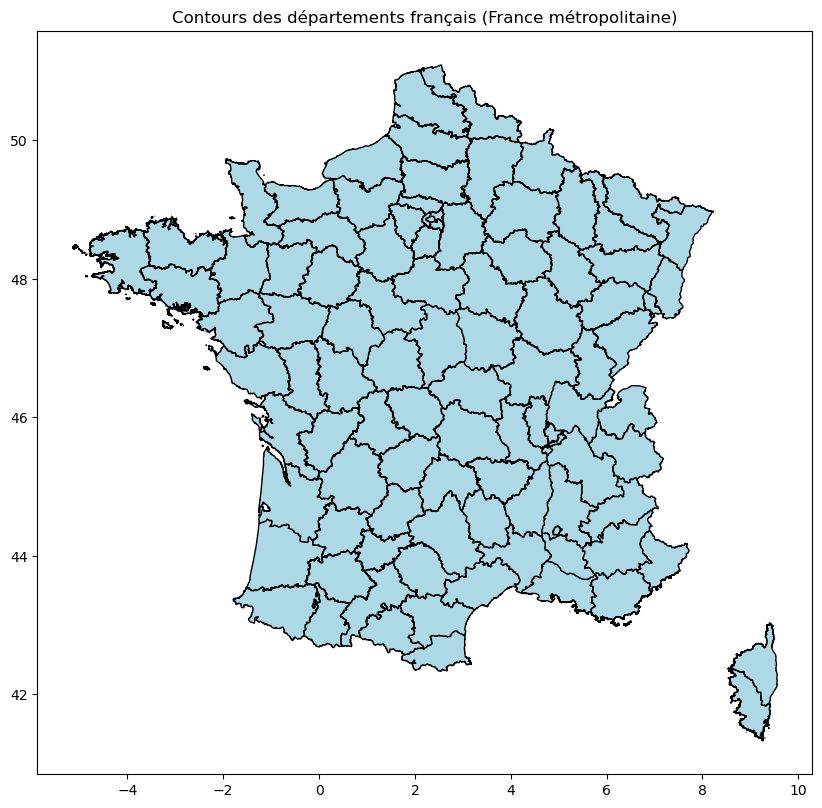

In [10]:
gdf_metropole.plot(figsize=(10, 10), edgecolor='black', color='lightblue')
plt.title("Contours des départements français (France métropolitaine)")
plt.show()

In [11]:
gdf2 = gpd.GeoDataFrame(
    df_epure,
    geometry=gpd.points_from_xy(df_epure["equip_x"], df_epure["equip_y"]),
    crs="EPSG:4326"  # WGS84 (coordonnées géographiques)
)
print(gdf2)

       inst_numero                           inst_nom        dep_nom new_code  \
0       I974110158      "Aire de jeux" Calebassiers 3     La Réunion    97411   
1       I221870011                      "Le Sépulcre"  Côtes-d'Armor  22187.0   
2       I291900016      "Le circuit de Saint Mathieu"      Finistère    29190   
3       I292150008  "Le circuit de Saint-Demet" N° 22      Finistère    29215   
4       I480880001        "le 107" saut à l'élastique         Lozère    48094   
...            ...                                ...            ...      ...   
157721  I572550005                  étang des oiseaux        Moselle  57255.0   
157722  I250850001                   étang des pelles          Doubs  25085.0   
157723  I422930006                    étangs de pêche          Loire    42293   
157724  I690180006                    étape cavalière          Rhône    69018   
157725  I575340005                  étrier de Moselle        Moselle  57534.0   

                        new

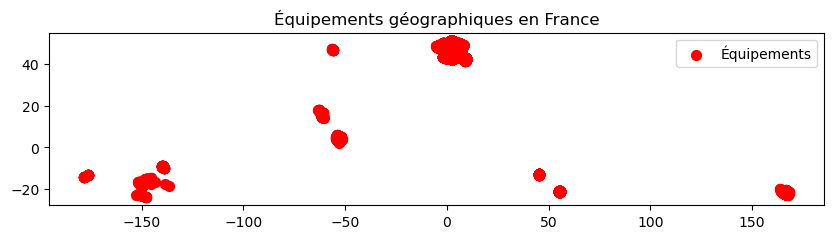

In [12]:
import matplotlib.pyplot as plt

# Tracer la carte
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="lightblue", edgecolor="black")
gdf2.plot(ax=ax, color="red", markersize=50, label="Équipements")
plt.legend()
plt.title("Équipements géographiques en France")
plt.show()

/tmp/ipykernel_29550/1569502398.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10", len(equip_types))  # Use a qualitative colormap
/tmp/ipykernel_29550/1569502398.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epure_metropole['color'] = df_epure_metropole['equip_type_famille'].map(color_dict)


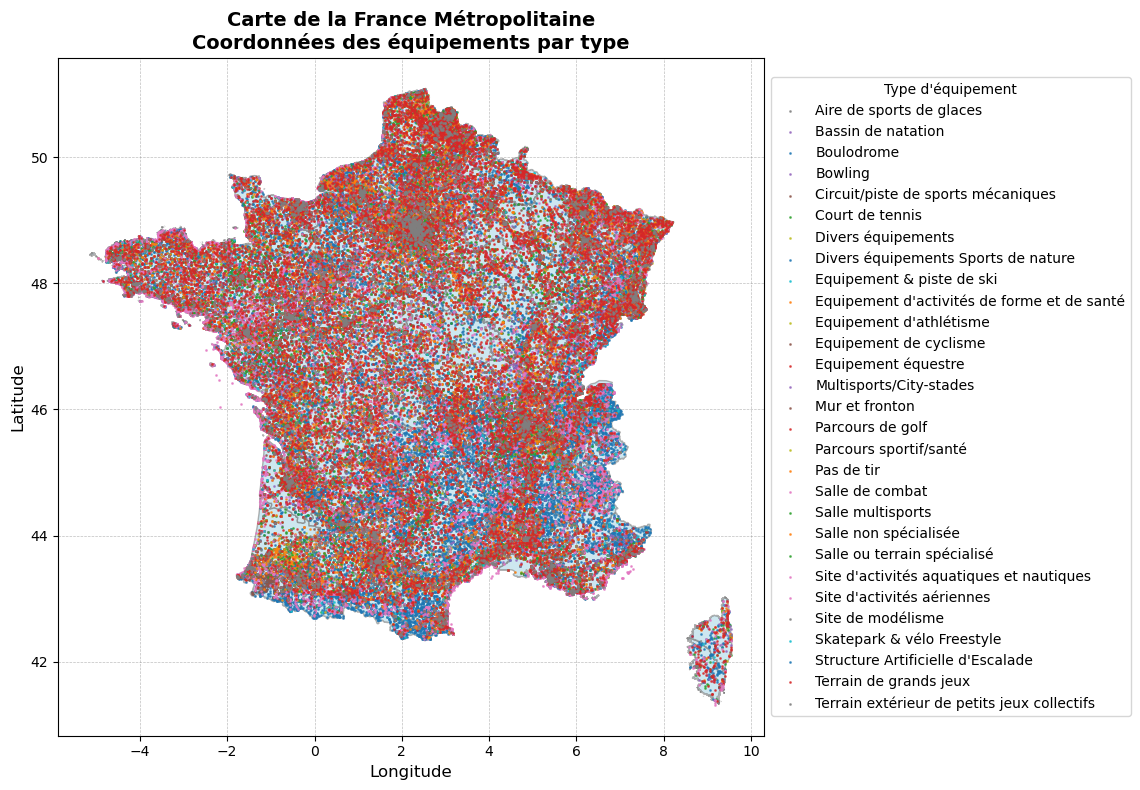

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Filter points to ensure they are in metropolitan France
df_epure_metropole = df_epure[
    (df_epure['equip_x'] >= -5) & 
    (df_epure['equip_x'] <= 10) & 
    (df_epure['equip_y'] >= 41) & 
    (df_epure['equip_y'] <= 52)
]

# Generate a color map for equipment types
equip_types = df_epure_metropole['equip_type_famille'].unique()
cmap = get_cmap("tab10", len(equip_types))  # Use a qualitative colormap
color_dict = {etype: cmap(i) for i, etype in enumerate(equip_types)}

# Assign colors to each equipment type
df_epure_metropole['color'] = df_epure_metropole['equip_type_famille'].map(color_dict)

# Create the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map of metropolitan France
gdf_metropole.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.6)

# Plot points with equipment types
for equip_type, group in df_epure_metropole.groupby('equip_type_famille'):
    ax.scatter(
        group['equip_x'],
        group['equip_y'],
        color=color_dict[equip_type],
        s=1,  # Adjust size for better visibility
        alpha=0.7,
        label=equip_type
    )

# Add legend
ax.legend(
    title="Type d'équipement",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

# Customize the plot
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements par type', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
print(df_epure['inst_acc_handi_bool'])

0         False
1          True
2         False
3          True
4         False
          ...  
157721    False
157722    False
157723     True
157724    False
157725    False
Name: inst_acc_handi_bool, Length: 157726, dtype: object


In [17]:
import numpy as np

score_handi = df_epure.copy()

# Transformer les booléens
score_handi['acc_handi'] = np.where(score_handi['inst_acc_handi_bool'] == True, 1, 0)
score_handi['acc_handi_aire'] = np.where(score_handi['equip_pmr_aire'] == True, 1, 0)
score_handi['acc_handi_sanit'] = np.where(score_handi['equip_pmr_sanit'] == True, 1, 0)

print(score_handi[['inst_acc_handi_bool', 'acc_handi', 'equip_pmr_sanit', 'acc_handi_sanit']].head(20))

   inst_acc_handi_bool  acc_handi equip_pmr_sanit  acc_handi_sanit
0                False          0             NaN                0
1                 True          1           False                0
2                False          0           False                0
3                 True          1           False                0
4                False          0             NaN                0
5                  NaN          0             NaN                0
6                 True          1           False                0
7                False          0           False                0
8                 True          1             NaN                0
9                 True          1             NaN                0
10               False          0           False                0
11               False          0           False                0
12                True          1           False                0
13               False          0           False             

In [18]:
#Calculer le score
# Calculer le score moyen des trois colonnes
score_handi['score'] = score_handi[['acc_handi', 'acc_handi_aire', 'acc_handi_sanit']].mean(axis=1)
score_handi['score'] = score_handi['score'].round(2)

# Vérifier les résultats
print(score_handi[['score']].head())


   score
0   0.00
1   0.67
2   0.00
3   0.33
4   0.00


In [19]:
table_contingence = pd.crosstab(score_handi['dens_lib'], score_handi['score'])
print(table_contingence)

score                            0.00  0.33   0.67  1.00
dens_lib                                                
Bourgs ruraux                   11705  6315  11221  4023
Ceintures urbaines               4170  2686   4948  2192
Centres urbains intermédiaires   3969  2625   4846  2860
Grands centres urbains           6589  4436   8538  4477
Petites villes                   3383  1984   3140  1568
Rural à habitat dispersé        22175  7575  15549  3168
Rural à habitat très dispersé    7442  1534   2785   558


In [20]:
# Create accessibility categories
conditions = [
    (score_handi['score'] == 0),
    (score_handi['score'] == 0.33),
    (score_handi['score'] == 0.67),
    (score_handi['score'] == 1)
]
choices = ['acces_nul', 'acces_min', 'acces_part', 'acces_total']
score_handi['accessibilite_pmr'] = np.select(conditions, choices, default=None)
print(score_handi['accessibilite_pmr'].head())

0     acces_nul
1    acces_part
2     acces_nul
3     acces_min
4     acces_nul
Name: accessibilite_pmr, dtype: object


/tmp/ipykernel_29550/126653655.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10", len(accessibilite))  # Utilisation d'une colormap qualitative
/tmp/ipykernel_29550/126653655.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_handi_metropole['color'] = score_handi_metropole['accessibilite_pmr'].map(color_dict)


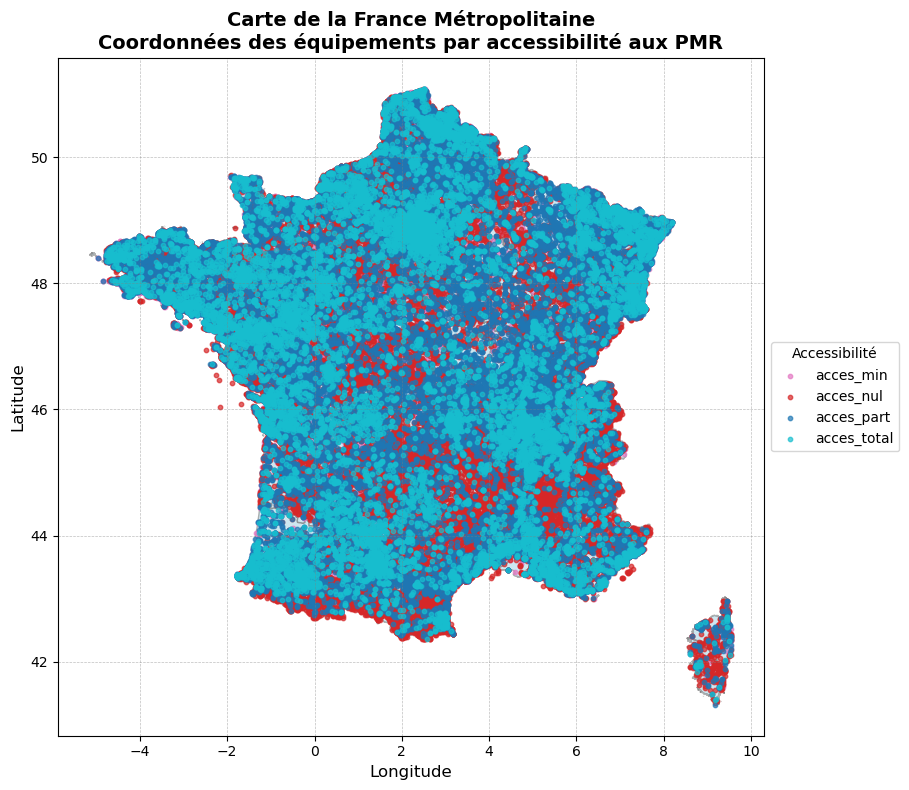

In [21]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Filtrage des données pour la France métropolitaine
score_handi_metropole = score_handi[
    (score_handi['equip_x'] >= -5) & 
    (score_handi['equip_x'] <= 10) & 
    (score_handi['equip_y'] >= 41) & 
    (score_handi['equip_y'] <= 52)
]

# Générer une carte de couleurs pour l'accessibilité
accessibilite = score_handi_metropole['accessibilite_pmr'].unique()
cmap = get_cmap("tab10", len(accessibilite))  # Utilisation d'une colormap qualitative
color_dict = {etype: cmap(i) for i, etype in enumerate(accessibilite)}

# Attribuer des couleurs à chaque type d'équipement
score_handi_metropole['color'] = score_handi_metropole['accessibilite_pmr'].map(color_dict)

# Créer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer la carte de base de la France métropolitaine
gdf_metropole.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.6)

# Tracer les points avec les types d'équipement
for accessibilite, group in score_handi_metropole.groupby('accessibilite_pmr'):
    ax.scatter(
        group['equip_x'],
        group['equip_y'],
        color=color_dict[accessibilite],
        s=10,  # Ajuster la taille pour une meilleure visibilité
        alpha=0.7,
        label=accessibilite
    )

# Ajouter la légende
ax.legend(
    title="Accessibilité",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

# Personnaliser le graphique
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements par accessibilité aux PMR', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Afficher le graphique
plt.show()